#### Clase 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X, y = digits.images, digits.target

In [3]:
# Add a channel dimension, and scale features to be in [0, 1]
X = np.expand_dims(X, axis=-1) / 16.0

# Convert labels to one-hot vectors
y = to_categorical(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
input_layer = Input(shape=X_train.shape[1:])

# Convolutional layers
conv1 = Conv2D(16, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, kernel_size=3, activation='relu')(pool1)
flat = Flatten()(conv2)

# Fully connected layers
dense1 = Dense(128, activation='relu')(flat)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(10, activation='softmax')(dense2)

model = Model(input_layer, output_layer)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 16)          160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                             

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
45/45 [==============================] - 2s 11ms/step - loss: 2.1707 - accuracy: 0.4134 - val_loss: 1.8689 - val_accuracy: 0.6750
Epoch 2/20
45/45 [==============================] - 0s 5ms/step - loss: 1.2923 - accuracy: 0.7091 - val_loss: 0.7707 - val_accuracy: 0.8083
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.6072 - accuracy: 0.8212 - val_loss: 0.4607 - val_accuracy: 0.8944
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.4191 - accuracy: 0.8775 - val_loss: 0.3780 - val_accuracy: 0.8944
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.8900 - val_loss: 0.3045 - val_accuracy: 0.9194
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.9214 - val_loss: 0.2589 - val_accuracy: 0.9250
Epoch 7/20
45/45 [==============================] - 0s 5ms/step - loss: 0.2311 - accuracy: 0.9255 - val_loss: 0.2024 - val_accuracy: 0.9500
Epoch 8/20
45/45 [=

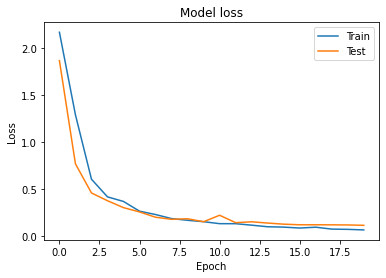

In [9]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

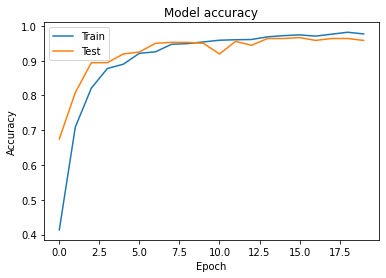

In [10]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='Train')
ax.plot(history.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()


In [11]:

model.save('data/my_model.h5')

In [13]:
from tensorflow.keras.models import load_model

In [19]:
# Returns a compiled model identical to the previous one
model_loaded = load_model('data/my_model.h5')
model_loaded.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 16)          160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                             

In [20]:
# To save the model in SavedModel format
model.save('data/my_model')

# To load the model from SavedModel format
model_loaded_2 = tf.keras.models.load_model('data/my_model')
model_loaded_2.summary()

INFO:tensorflow:Assets written to: data/my_model\assets


INFO:tensorflow:Assets written to: data/my_model\assets


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 16)          160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                             